# Numerical solution of the heat equation using an implicit scheme

In [1]:
from IPython.display import IFrame

This mini-course is accompanied by pdf notes (Heat_eq.pdf) outlining mathematics behind the task. The file is can be located in the same folder as this ipynb. We embed it here for convenience purposes.

In [2]:
IFrame("Heat_eq.pdf", width=750, height=450)

Right below we demonstrate logic of the program by using a diagram. We start by initiating input parameters $\rho$, $c$, $\lambda$, $\hbar$, $\tau$. After that we set up initial condition for temperature. When we have indentify all the parameters needed to start our experiment, see diagram below, we enter the loop by moving on the grid. One iterative step is given by $\tau$. For each such a step we calculate temperature until the moment when time of experiment is over.

In [3]:
IFrame("BS.pdf", width=750, height=450)

Here the main body of the program is presented.

In the next cell, we create a function responsible for numerical solution. We start with a cycle while implementing a tridiagonal matrix method. In the last cycle associated with temperature, we implement a reverse part of the method and calculate the temperature field for the layer n+1.

In [4]:
def numerical_sol(time, time_end, rho, Cp, lam, T_0, T_r, tau, x_R = 0.1):
    """
        time         - Starting time
        time_end     - Ending time
        rho, Cp, lam - Parameters of the heat equation model. 
                       written in SI units
        T_0          - initial values of a temperature
        T_r          - final (constant) temperature
        tau          - time step
        x_R          - parameter needed for identifying space step (x_R / 100.0)
    
    """
    
    x = [k/1000 for k in range(100)]
    N = len(x) - 1
    h = x_R / 100.0

    T = [T_0 for i in range(N+1)]
    alp = [0.0 for i in range(N+1)]
    bet = [0.0 for i in range(N+1)]
    A = [0.0 for i in range(N+1)]
    B = [0.0 for i in range(N+1)]
    C = [0.0 for i in range(N+1)]
    F = [0.0 for i in range(N+1)]

    while time < time_end:
        time = time + tau

        alp[0] = 1
        bet[0] = 0

        for i in range(1,N):
            A[i] = lam / h**2
            B[i] = 2 * lam / h**2 + rho * Cp / tau
            C[i] = lam / h**2
            F[i] = -(rho * Cp / tau) * T[i]

            alp[i] = A[i] / (B[i] - C[i] * alp[i-1])
            bet[i] = (C[i] * bet[i-1] - F[i]) / (B[i] - C[i] * alp[i-1])

        T[N] = T_r

        for i in range(N-1, -1,-1):
            T[i] = alp[i]*T[i+1] + bet[i]
            
    return T

Next, the `numerical_sol` function is used for some parameters. You can play with parameters to get the different result you are interested in the most.

In [5]:
temp_arr = []
t = [10,30,100,200]
for time_end in t:
    temperature = numerical_sol(time = 0,
                  time_end = time_end,
                  rho = 7800.0,
                  Cp = 460.0,
                  lam = 15,
                  T_0 = 27.0,
                  T_r = 50.0,
                  tau = 0.01)
    temp_arr.append(temperature)

In [6]:
# libraries need for visualization.
from matplotlib import pyplot as plt

#responsible for plotting a graph directly in this notebook
%matplotlib inline 

# making a graph of vector type (you may change it to png or jpeg)
%config InlineBackend.figure_formats = ['svg']  

And finally, we are plotting our results. Notice that `temp_arr` variable contains 4 values. The same number is used while creating a plot below. If you are interested in testing more parameters, you will need to write down more `plt.plot()` commands.

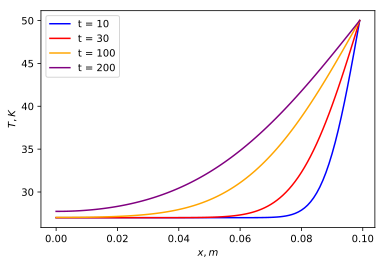

In [7]:
x = [k/1000 for k in range(100)]
plt.plot(x,temp_arr[0], label='t = 10', color='blue')
plt.plot(x,temp_arr[1], label='t = 30', color='red')
plt.plot(x,temp_arr[2], label='t = 100', color='orange')
plt.plot(x,temp_arr[3], label='t = 200', color='purple')
plt.legend();
plt.xlabel('$x, m$')
plt.ylabel('$ T, K$')
plt.show()